### 데이터셋 불러오기

In [48]:
import os
import tensorflow as tf
import pickle
import random

class KTSDataset():
    def __init__(self, data_address="/aiffel/aiffel/sml-course/Korean-Tourist-Spot-Dataset-master/kts", random_seed=-1):
        self.database_address = data_address
        self.random_seed = random_seed
        if random_seed != -1:
            random.seed(random_seed)
            tf.random.set_seed(random_seed)
        
    def _get_parse_function(self):
        def parse_function(img_path):
            image = tf.image.decode_jpeg(tf.io.read_file(img_path))
            image = tf.image.resize(image, (84, 84))
            image = tf.cast(image, tf.float32)

            return image / 255.
        return parse_function

    def make_dataset(self, mode):
        images = []
        tags = []
        text = []
        self.num_data = 0
        
        
        with open("/kaggle/input/modulab-clip/Korean-Tourist-Spot-Dataset-master/kts/train.pickle", "rb") as fr:
            dataset = pickle.load(fr)
        for data in dataset:
            if data["hashtag"] != []:
                img_path = data["img_name"].replace("kts\\", "").replace("\\", "/")
                img_path = os.path.join(self.database_address, img_path)
                images.append(img_path)
                txt = data['text']
                text.append(txt)
                tags.append(random.choice(data["hashtag"]))
                self.num_data += 1
        return images, tags, text

    def get_dataset(self,
                    folders,
                    batch_size,
                    reshuffle_each_iteration=True,):
        imgs, tags, text = self.make_dataset(folders)
        tag_dataset = tf.data.Dataset.from_tensor_slices(tags)
        img_dataset = tf.data.Dataset.from_tensor_slices(imgs)
        text_dataset = tf.data.Dataset.from_tensor_slices(text) 
        img_dataset = img_dataset.map(self._get_parse_function(), num_parallel_calls=tf.data.experimental.AUTOTUNE)
        
        dataset = tf.data.Dataset.zip((img_dataset, tag_dataset, text_dataset))
        dataset = dataset.shuffle(buffer_size=self.num_data, reshuffle_each_iteration=reshuffle_each_iteration)
        dataset = dataset.batch(batch_size, drop_remainder=True)

        return dataset

database = KTSDataset("/kaggle/input/modulab-clip/Korean-Tourist-Spot-Dataset-master/kts")
dataset = database.get_dataset("train", batch_size = 4)

In [3]:
imgs, tags, texts = database.make_dataset("train")

In [10]:
# import re

# def clean_hashtags(tag_list):
#     cleaned = []
#     for tag in tag_list:
#         if isinstance(tag, str):
#             tag = tag.replace("#", "")                           # 1. '#' 제거
#             tag = re.sub(r"[^0-9가-힣,]", "", tag)               # 2. 숫자, 한글, 콤마만 남기기
#             if tag:  # 빈 문자열 제외
#                 cleaned.append(tag)
#     return cleaned


# cleaned_tags = clean_hashtags(tags)
# print(cleaned_tags)

['유경', '월미도', '일상', '경주월드', '04', '마이랜드', '롯데월드', '월미도테마파크', '롯데월드', '롯데월드', '롯데월드', '롯데월드', '일상스타그램', '바이킹', '환상의나라', '경주월드', '맞팔로우', '롯데월드', '데일리', '롯데월드', '롯데월드', '용인', '롯데월드', '월미도바이킹', '롯데월드', '아이스파크', '티익스프레스', '졸업', '월미도테마파크', '경주월드', '월미테마파크', '롤러코스터', '야경', '경주월드', '에버랜드', '소통', '마이랜드', '에버랜드', '무보정', '경치', '경주월드', '월미도테마파크', '경주월드', '경주', '일상스타그램', '황리단길', '에버랜드', '롯데월드', '이쁘다', '사파리', '눈썰매장', '데이트', '롯데월드', '경주월드', '월미도테마파크', '드라켄', '경주여행', '근황', '경주월드', '경주', '롯데월드', '액티', '월미도테마파크', '바다', '마이랜드', '롯데월드', '데이트', '월미도테마파크', '롯데월드', '동화마을', '마이랜드', '일상', '경주', '경주월드', '친구들이랑', '사진첩', '롯데월드', '마지막은', '관람차', '죤잼핵잼', '롯데월드', '주말', '롯데타워', '경주월드', '놀이공원그램', '사진그램', '롯데월드', '롯데월드30주년', '월미도테마파크', '경주', '6살', '테마파크', '회전목마', '겨울여행', '롯데월드', '월미도', '롯데월드', '아날로그파리', '20190121', '롯데월드', '10대', '경주월드', '우든코스터', '롯데월드', '어제', '백운호수카페', '경주월드', '롯데월드', '롯데월드', '롯데월드', '드라켄', '허리케인은3번연속조짐', '인천', '교복들', '디스코팡팡', '롯데월드', '경주월드', '롯데월드', '마이랜드', '마이랜드', '관람차', '경주월드', '회전목마', '옆에', '경주월드',

### Pre-trained model 호출

In [6]:
!pip install chromadb
import chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 88.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import requests
import torch
from PIL import Image
import chromadb
from transformers import AutoModel, AutoProcessor

# repo = "Bingsu/clip-vit-large-patch14-ko"
# pipe = pipeline("zero-shot-image-classification", model=repo)

repo = "Bingsu/clip-vit-large-patch14-ko"
model = AutoModel.from_pretrained(repo)
processor = AutoProcessor.from_pretrained(repo)

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/870k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

### ChromaDB에 Tag 저장

In [202]:
# !rm -rf ./chroma_db

In [12]:
# import chromadb
# from chromadb.config import Settings

# chroma_client = chromadb.PersistentClient(
#     path="./chroma_db",
#     settings=Settings(allow_reset=True)
# )
# collection = chroma_client.get_or_create_collection(name="tags")
# # 


In [ ]:
def get_embedding(text):
    inputs = processor(text=[text], return_tensors="pt", padding=True)
    with torch.inference_mode():
        outputs = model.get_text_features(**inputs)  
    return outputs.squeeze().tolist() 

# meta data
tag_vectors = {tag: get_embedding(tag) for tag in tags}
# tag_vectors = {tag: get_embedding(tag) for tag in cleaned_tags}


'''
https://www.datacamp.com/tutorial/chromadb-tutorial-step-by-step-guide
'''
chroma_client = chromadb.PersistentClient(path="./chroma_db")  
collection = chroma_client.get_or_create_collection(name="tags") 
# collection = chroma_client.create_collection(name="tags") 

for tag, vector in tag_vectors.items():
    collection.add(
        ids=[tag], 
        embeddings=[vector],
        metadatas=[{"tag": tag}] 
    )

### 추론 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoModel, AutoProcessor

'''
어떤 함수 사용하는지 확인
https://huggingface.co/docs/transformers/en/model_doc/clip
'''

def get_image_embedding(image_path):
    image = Image.open(image_path).convert("RGB") 

    plt.imshow(image)
    plt.axis("off")  
    plt.show()

    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        image_embedding = model.get_image_features(**inputs)

    return image_embedding.squeeze().cpu().numpy()

def get_text_embedding(text):
    inputs = processor(text=[text], return_tensors="pt")
    with torch.no_grad():
        text_embedding = model.get_text_features(**inputs)

    return text_embedding.squeeze().cpu().numpy()


def search_tags(image, text, top_k=5):
    print(image)
    image_vec = get_image_embedding(image) 
    text_vec = get_text_embedding(text)  
    final_embedding = (image_vec + text_vec) / 2  

    results = collection.query(
                                query_embeddings=[final_embedding],  
                                n_results=top_k,
                                include=["embeddings", "metadatas"]
                            )
    return results


제주 바다와는 또 다른 느낌


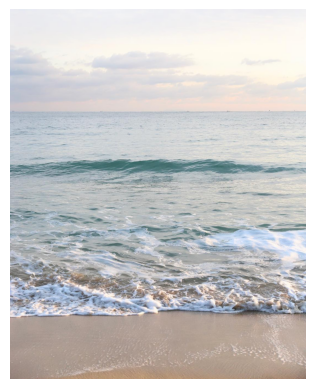

['#여수낮바다', '#여수바다', '#경포대해수욕장', '#제주살이', '#만성리해수욕장']


In [58]:
image = imgs[1000]
text = texts[1000]  
print(text)

results = search_tags(image, text)
print(results['ids'][0])

롯데월드


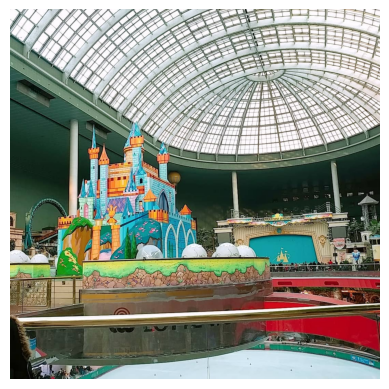

['#롯데월드몰', '#롯데월드', '#잠실롯데월드몰', '#롯데월드타워', '#롯데월드교복']


In [43]:
image = imgs[10]
text = texts[10]  
print(text)
results = search_tags(image, text)
print(results['ids'][0])

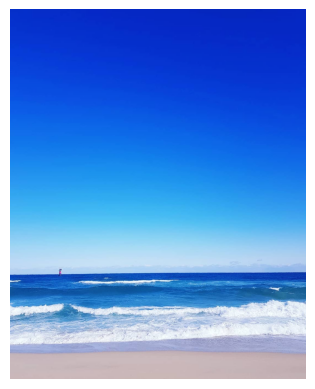

['#예쁜바다', '#추워지는건아숩', '#만조때라그런지바닷물도찰랑찰랑', '#겨울엔노답', '#에머랄드빛바다']


In [38]:
image = imgs[999]
text = texts[999]  
results = search_tags(image, text)
print(results['ids'][0])

query:하트
tags:#롯데월드


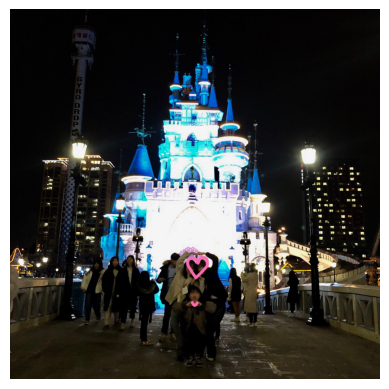

['#후르츠산도', '#큰가리섬', '#혼등', '#일출산행', '#호명호수']


In [46]:
image = imgs[99]
text = texts[99] 
print(f'query:{text}')
print(f'tags:{tags[99]}')


results = search_tags(image, text)
print(results['ids'][0])

맑은 하늘과 옥빛 바다의 완벽한 조화
/kaggle/input/modulab-clip/Korean-Tourist-Spot-Dataset-master/kts/images/beach/622.jpg


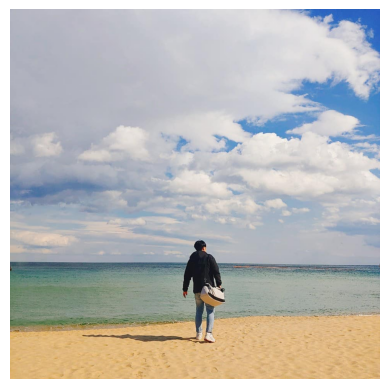

['#여수바다', '#경포대해수욕장', '#에메랄드빛바다', '#만조때라그런지바닷물도찰랑찰랑', '#에머랄드빛바다']


In [15]:
image = imgs[1321]
text = texts[1321]  
print(text)
results = search_tags(image, text)
print(results['ids'][0])

잘 놀다 갑니다.
/kaggle/input/modulab-clip/Korean-Tourist-Spot-Dataset-master/kts/images/beach/292.jpg


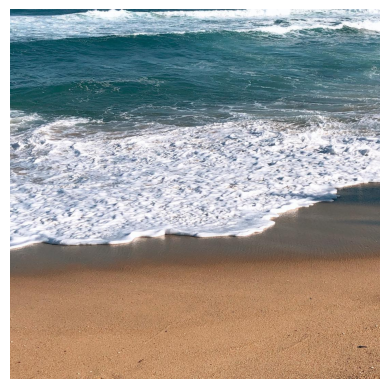

['#아틀란티스탔으면다탄거', '#꼬모호수', '#존맛탱', '#만조때라그런지바닷물도찰랑찰랑', '#의암호나들길']


In [14]:
image = imgs[991]
text = texts[991] 
print(text)
results = search_tags(image, text)
print(results['ids'][0])

### VecotrDB 확인

In [12]:
data = collection.get(include=["embeddings", "metadatas"])
print(data)

{'ids': ['#재밌어', '#월미도테마파크', '#일상', '#경주월드', '#04', '#마이랜드', '#롯데월드', '#소통해요', '#여행', '#조개구이', '#아이폰7플러스', '#맞팔로우', '#데일리', '#kfc', '#월미도바이킹', '#행복해', '#에버랜드', '#졸업', '#월미테마파크', '#헬스타그램', '#view', '#셀스타그램', '#인천가볼만한곳', '#경주눈썰매장', '#인천', '@jurabek_egamberdiev', '#경주', '#일상스타그램', '#드라켄', '#라희네겨울여행', '#friends', '#고딩', '#회전바구니', '#홍대', '#득템', '#비눗방울', '#주말', '#카메라왜이래', '#허리부러짐', '#everlandthemepark', '#솔거미술관', '#존맛', '#사진첩', '#가고싶다', '#따뜻할때오자', '#관람차', '#진짜', '#everland', '#콧바람', '#줌마일상', '#롯데월드30주년', '#아기', '#테마파크', '#회전목마', '#랜드', '#좋아요', '#오늘아님', '#filmphotography', '#석촌호수', '#일상스타스램', '#짜릿해', '#우든코스터', '#나중에또보자', '#야경', '#경주여행', '#연이', '#무조건', '#소시호', '#꿀재미', '#바로타기', '#남자친구랑', '#탑승', '#film', '#열여덟', '#바다', '#인천데이트', '#데이트', '#월미도', '#즐겁다그램', '#대관람차', '#소리한번을안지르고탐', '#lotteworld', '#diary', '#구름', '#daily', '#디스코팡팡', '@shouminee', '#재미', '#Lotteworld', '#2page', '#인싸', '#lightroom', '#부평', '#눈썰매', '#도트락월드', '#', '#경주월드어뮤즈먼트', '#도형이', '#기분날씨푸르미', '#자이로드롭', '#5살아들', '#모노레일', '#Uncle', 

# Test

In [82]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/working/dataset_validation.csv')


In [27]:
# flattened_tags = []

# for line in tags:
#     for tag in line.split(','):
#         cleaned_tag = tag.strip()
#         flattened_tags.append(cleaned_tag)

# print(flattened_tags)
# tags = flattened_tags

['83타워전망대', '부산', '오륙도', '등산스타그램', '산스타그램', '단양', '소백산', '서울', '창경궁', '나들이', '눈', '눈온날', '설경', '사진그램', '사진스타그램', '모노레일', '빛가람전망대', '봄', '나주', '동굴', '경희궁', '숭정전', '고궁', '추석연휴', '심척', '장호항', '미로같은', '환선굴', '동해', '간식', '커피', '성수동맛집', '카페', '분위기', '광명동굴', '장자호수공원', '장자못', '젊은부부', '나들이', '주말등산', '속리산', '문장대', '천왕봉', '등산', '광명동굴', '경주월드', '포천', '청계호수', '경복궁', '궁궐', '동작구', '관악구', '보라매공원', '봄', '날씨', '오륙도', '오륙도스카이워크', '뚜벅이여행', '탁트인바다', '청계산', '푸른하늘', '간식', '행복', '주말', '성수동카페', '어니언', '제주여행', '제주', '우도', '사빈백사', '우도봉', '하고수동해수욕장', '서울', '종로', '경복궁', '한복', '엄마', '여행', '강원도', '영월', '고씨동굴', '동굴', '여수', '여천', '여행', '만성리해수욕장', '쁘라삐룬태풍', '파도', '경희궁', '점심산책', '서울여행', '가족여행', '휴가', '메리크리스마스', '창덕궁', '창덕궁', '대구', '대구여행', '83타워', '83타워전망대', '간식', '바닐라라떼', '카페']


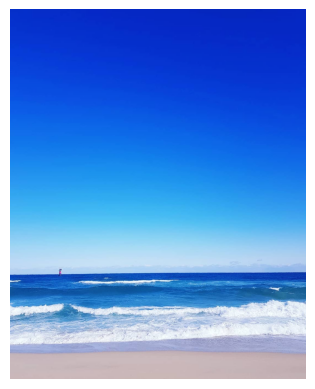

['둥근달바다곁', '바다와우리', '아름다운오륙도경치', '하고수동해변', '범섬이보인다']


In [30]:
# 태그 전처리시 결과값이 달라짐
image = imgs[999]
text = texts[999]  
results = search_tags(image, text)
print(results['ids'][0])

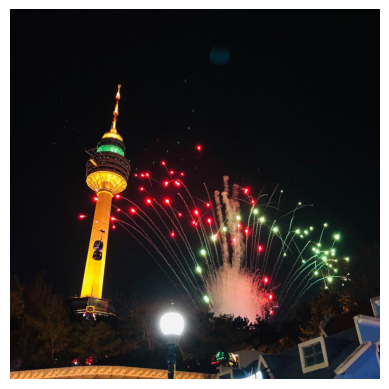

test:사탕이 흩뿌려진다~
['여수볼거리', '서빈백사', '세석산장', '3번박씨는키좀더키워서오자요135이상가능', '석어당']


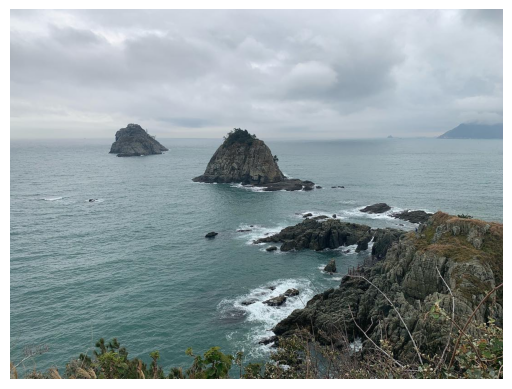

test:오룩도 경치 오오오오오 뭐야뭐야 너무 끝내주자너
['아름다운오륙도경치', '여수구경', '둥근달바다곁', '범섬뷰를바라보며', '하고수동해변']


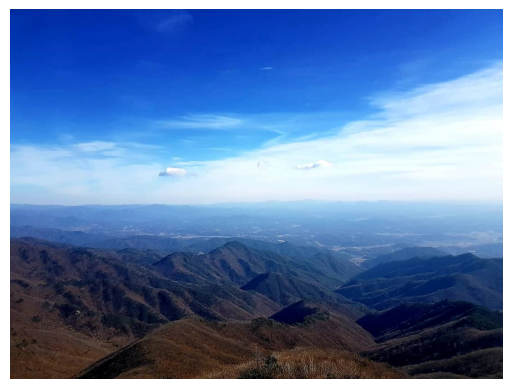

test:올해 최고 한파가 있던 날 소백산 산행.... 몸을 제다로 가누지 못할 만큼의 칼바람을 경험하고 옴.... 소백아~ 다음엔 꽃 피는 계절에 올테니 살살 좀 다뤄줘~
['호명산정상', '지리산겨울종주', '호명산정상위에호수', '춘천중도물레길카누', '광교산']


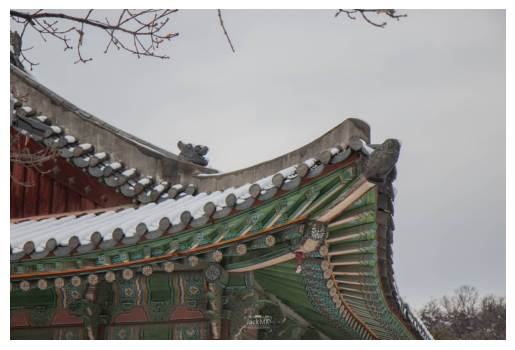

test:궁은 이쁜데 하늘이 너무 흐리다
['고궁의밤', '백양사', '세석산장', '서빈백사', '경희궁']


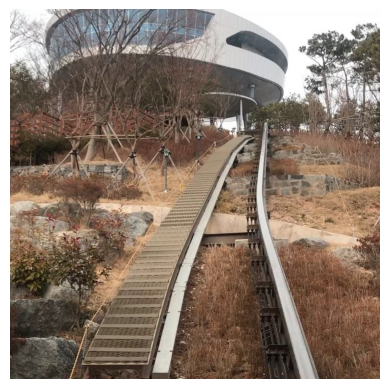

test:빛가람전망대 모노레일 탑승시간 2분여 한번은 탈만 함 봄 이되면 또 와야겠다..
['호명산정상', '설악산케이블카', '속초등대전망대', '적상산전망대', '울산대교전망대']


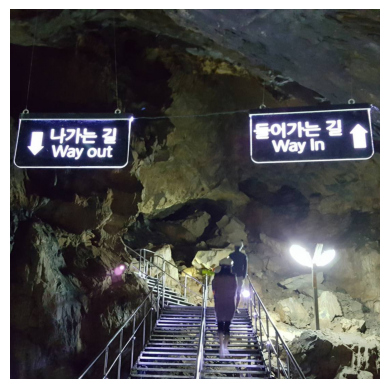

test:집엔 언제 가지?
['의암호나들길', '소확행', '이가을이가기전에언능즐겨야함', '누구랑갔냐고물어보는사람뚝배기깰예정', '석어당']


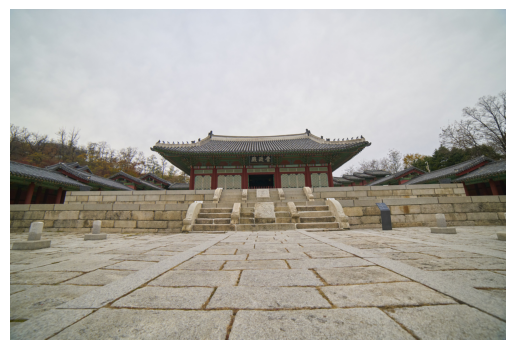

test:흐린날의 경희궁 숭정전
['창덕궁후원', '경복궁나들이', '창경궁야간개장', '창경궁', '덕수궁무료설명50분']


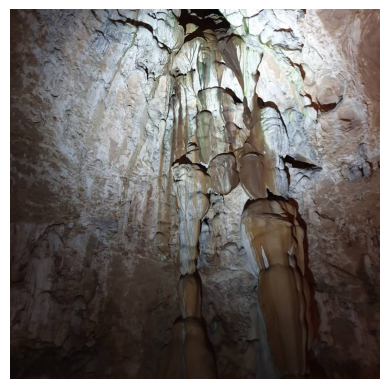

test:추석 연휴는 미로같은 환선굴에서 시원하게 보내고 갑니다.
['울산자수정동굴나라', '울산자수정동굴', '삼척시환선굴', '용연동굴', '제주만장굴']


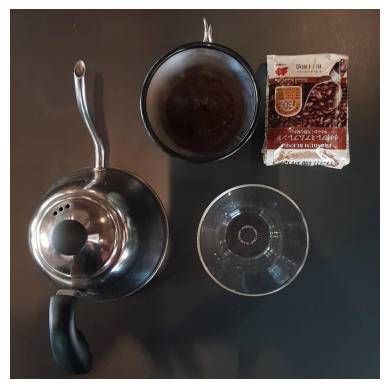

test:북해도 출장 다녀왔습니다!
['둥근달바다곁', '세석산장', '전리단길', '연하남과데이트', '법환포구']


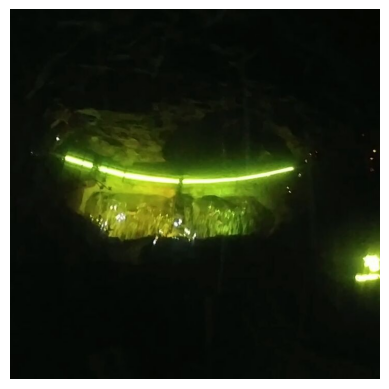

test:여름엔 시원한 광명동굴로 오세요!
['광명동굴', '울산자수정동굴나라', '울산자수정동굴', '삼척시환선굴', '광명동굴테마파크']


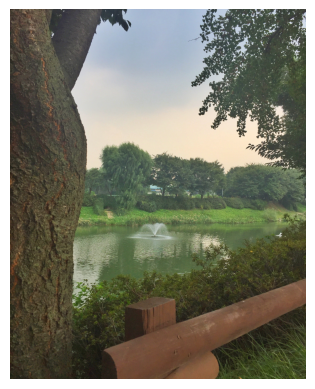

test:젊은 부부의 장자호수공원 나들이
['호명호수공원', '파주마장호수', '월명호수', '구리한강공원', '양화한강공원']


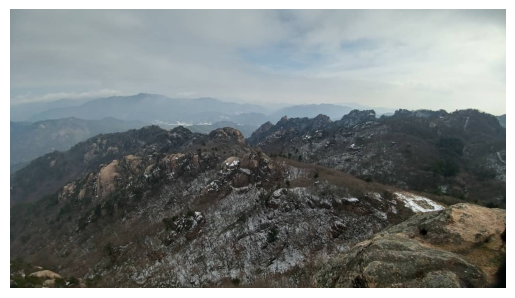

test:주말등산.........
['새해등산', '주말등산', '산행스타그램', '나홀로등산', '등산스타그램']


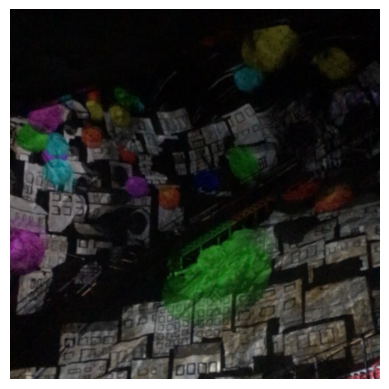

test:광명동굴 탐험대!
['울산자수정동굴나라', '삼척시환선굴', '광명동굴', '울산자수정동굴', '제주만장굴']


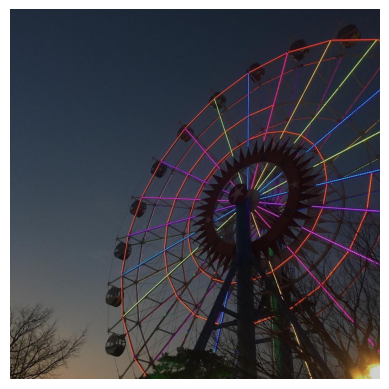

test:영롱하게 빛나는 대관람차
['대관람차', '경회루야경', '회전목마', '여수볼거리', '관람차']


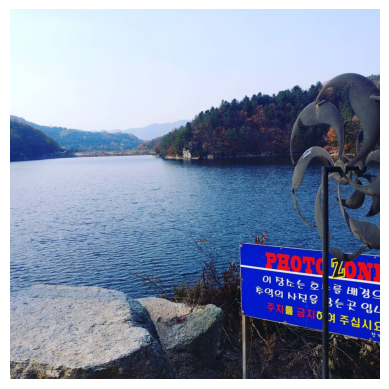

test:자연은 정말 위대하고 아름다운 것 같아...
['아름다운오륙도경치', '호명호수', '자연의신비', '신선대', '향천']


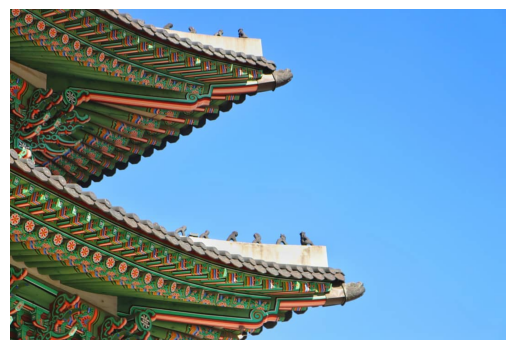

test:날도 좋고 기분도 좋았던 날
['이가을이가기전에언능즐겨야함', '흥화문', '우화정', '신선대', '능운대']


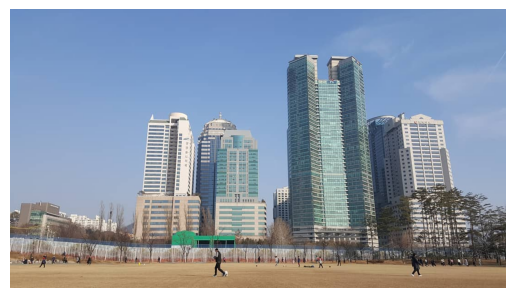

test:날이 좋아서 사람이 많구나
['일출산행', '경기대', '대구나들이', '둥근달바다곁', '하늘공원']


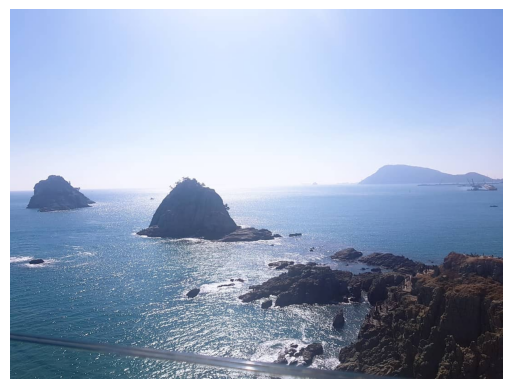

test:오륙도스카이워크에서 뚜벅이여행~ 아침이라 퉁퉁부은얼굴이네!! 탁트인바다에 가슴이뻥뚫림
['호명산정상', '세린부산', '경회루야경', '울산자수정동굴나라', '울산대교전망대']


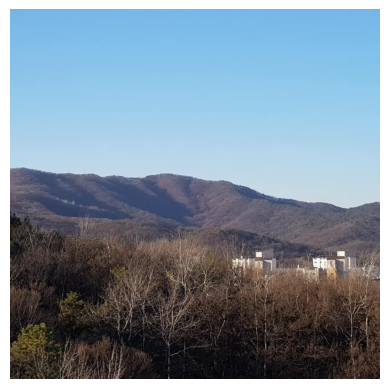

test:오늘 새벽 수영 갔다와서 거실에서 본 청계산. 푸른 하늘과 맑은 공기 좋네.. 하지만 조금 춥네
['춘천중도물레길카누', '호명산정상', '호명산정상위에호수', '가평8경', '경회루야경']


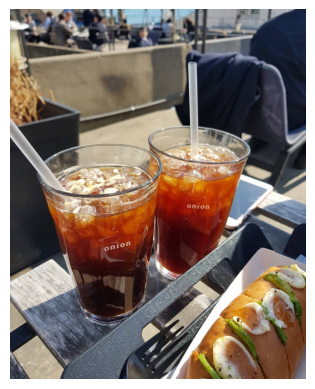

test:주말은 여유롭게 보내자
['주말엔역시산', '이가을이가기전에언능즐겨야함', '신선대', '시원시원', '일출산행']


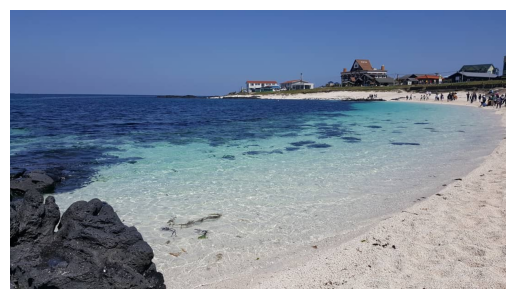

test:우도의 모든 곳이 무척 예뻐서 감동적이었음.
['아름다운오륙도경치', '하고수동해변', '경포대해수욕장', '서귀포범섬', '곽지과물해변']


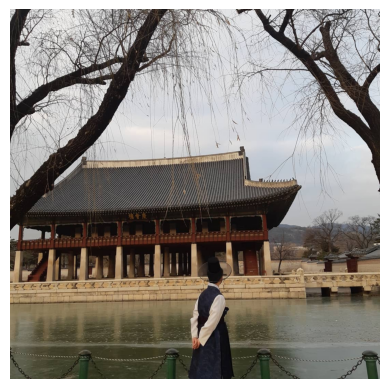

test:한복입고, 경복궁 나들이!
['경복궁나들이', '경복궁야간개장', '경복궁', '창덕궁후원', '경복궁별빛야행']


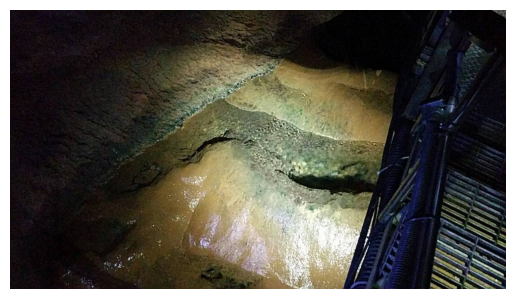

test:엄마와 두번째 여행 넷째날과 다섯번째 여행지. 강원도 영월 고씨동굴에 벙문했다. 4~5억년전에 형성 된 동굴. 고씨동굴이란 이름은 임진왜란 때 고씨 일가족이 이 동굴 속에 피신하여 난을 피하였다는데서 유래되었다고 한다.
['울산자수정동굴나라', '울산자수정동굴', '제주만장굴', '삼척시환선굴', '천곡천연동굴']


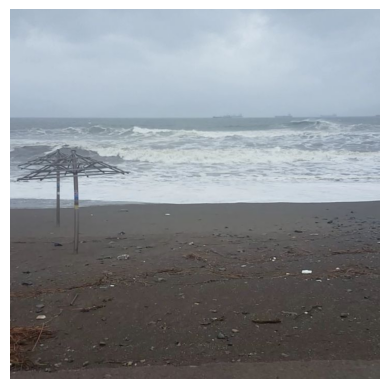

test:쁘라삐룬 태풍 오던 즈음. 파도 심하네.
['제주태풍', '부산파도', '노을지는서해바다', '경포대해수욕장', '하고수동해변']


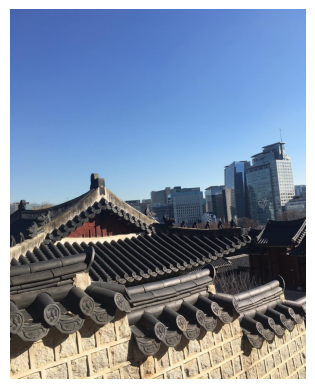

test:경희궁 점심산책
['경복궁나들이', '창덕궁후원', '덕수궁무료설명50분', '창경궁', '경성대부경대']


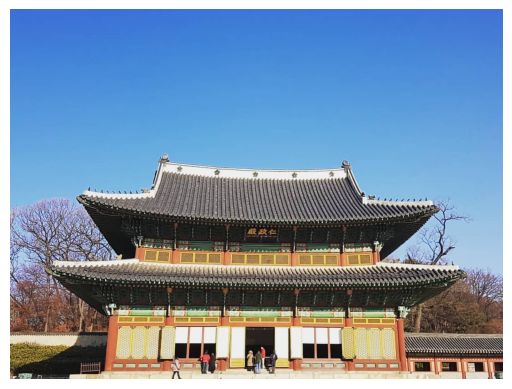

Token indices sequence length is longer than the specified maximum sequence length for this model (358 > 77). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (358) must match the size of tensor b (77) at non-singleton dimension 1

In [29]:
# 테스트
res= []
tag_lst = []
def view_dataset(df):
    for idx, row in df.iterrows():
        partial_path = '/' + row["Image Path"].split('/', 1)[1]

        partial_path = partial_path.lstrip('/')  
        image_path = os.path.join('/kaggle/input/modulab-clip/Korean-Tourist-Spot-Dataset-master', partial_path)
        image = Image.open(image_path)


        results = search_tags(image_path, row["Text"],5)
        print(f'test:{row["Text"]}')
        print(results['ids'][0])
        res.append(results['ids'][0])
        tag_lst.append(row['Hashtag'])
view_dataset(df)

In [18]:
cleaned = [ [tag.strip() for tag in row.split(',')] for row in tag_lst ]
answer = cleaned

[['83타워전망대'],
 ['부산', '오륙도'],
 ['등산스타그램', '산스타그램', '단양', '소백산'],
 ['서울', '창경궁', '나들이', '눈', '눈온날', '설경', '사진그램', '사진스타그램'],
 ['모노레일', '빛가람전망대', '봄', '나주'],
 ['동굴'],
 ['경희궁', '숭정전', '고궁'],
 ['추석연휴', '심척', '장호항', '미로같은', '환선굴', '동해'],
 ['간식', '커피', '성수동맛집', '카페', '분위기'],
 ['광명동굴'],
 ['장자호수공원', '장자못', '젊은부부', '나들이'],
 ['주말등산', '속리산', '문장대', '천왕봉', '등산'],
 ['광명동굴'],
 ['경주월드'],
 ['포천', '청계호수'],
 ['경복궁', '궁궐'],
 ['동작구', '관악구', '보라매공원', '봄', '날씨'],
 ['오륙도', '오륙도스카이워크', '뚜벅이여행', '탁트인바다'],
 ['청계산', '푸른하늘'],
 ['간식', '행복', '주말', '성수동카페', '어니언'],
 ['제주여행', '제주', '우도', '사빈백사', '우도봉', '하고수동해수욕장'],
 ['서울', '종로', '경복궁', '한복'],
 ['엄마', '여행', '강원도', '영월', '고씨동굴', '동굴'],
 ['여수', '여천', '여행', '만성리해수욕장', '쁘라삐룬태풍', '파도'],
 ['경희궁', '점심산책']]

In [20]:
res

[['제주의봄', '서빈백사', '서울의달', '석어당', '양띠아가'],
 ['여수낮바다', '하고수동해변', '만조때라그런지바닷물도찰랑찰랑', '제주의봄', '이기대해안산책로'],
 ['북한산트레킹', '북한산상장능선', '광교산', '관악산자운암국기봉', '청계산'],
 ['홍화문', '경희궁산책', '백양사', '의암호물레길카누장', '인조반정으로광해군은경희궁에들어와보지못하고'],
 ['설악산케이블카', '속초등대전망대', '호명호수전망대', '나주빛가람전망대', '적상산전망대'],
 ['산을만만하게보다가는', '섬산행', '내마음에도봄이오길', '이박삼일동안찍은사진이', '소확행'],
 ['덕수궁돌담길', '인조반정으로광해군은경희궁에들어와보지못하고', '경희궁산책', '창덕궁후원', '덕수궁중화전'],
 ['울산자수정동굴', '용연동굴', '제주만장굴', '통영굴', '영월고씨동굴'],
 ['의암호물레길카누장', '천공의성라퓨타', '양주백석', '여수만성리', '제주의봄'],
 ['광명동굴', '울산자수정동굴', '통영굴', '영월고씨동굴', '천곡천연동굴'],
 ['청담배수지공원', '호명호수공원', '월명호수', '석촌호수', '의정부직동공원'],
 ['우람산악회', '무박산행', '눈산행', '산책같은등산', '등산스타그램'],
 ['광명동굴', '통영굴', '울산자수정동굴', '영월고씨동굴', '제주만장굴'],
 ['대관람차야경', '어린이용대관람차', '대관람차', '홍화문', '회전목마'],
 ['석촌레이크', '호명호수', '섬산행', '신선대', '이가을이가기전에언능즐겨야함'],
 ['이가을이가기전에언능즐겨야함', '영금정', '이박삼일동안찍은사진이', '신선대', '내마음에도봄이오길'],
 ['청담배수지공원', '파주나들이', '일출산행', '대구당일치기', '서울은맑음'],
 ['세린부산', '선재도목섬', '울산대교전망대', '여수바다', '관악산자운암국기봉'],
 ['관악산자운암국기봉', '북한산상장능선', '호명호수전망대', 

In [22]:
import numpy as np
from typing import List

def single_precision_k(truth, predict, k):
    matching = 0
    for element in predict[:k]:
        if element in truth:
            matching += 1
    return matching / len(predict[:k])

def precision_k(truth, predict, k=8):
    precision = [single_precision_k(t, p, k) for t, p in zip(truth, predict)]
    return np.average(precision, axis=0)

def single_recall_8(tags: List[str], top_k_tags: List[str]):
    corrects = sum(1 for tag in top_k_tags if tag in tags)
    return corrects / len(tags) if tags else 0

def recall_k(truth, predict, k=8):
    recall = [single_recall_8(t, p[:k]) for t, p in zip(truth, predict)]
    return np.average(recall, axis=0)

def f1_k(truth, predict, k=8):
    precision = precision_k(truth, predict, k)
    recall = recall_k(truth, predict, k)
    return (2 * precision * recall) / (precision + recall + 1e-8)  # 분모 0 방지

# 예시 데이터
truth = cleaned
predict = res

# 평가
precision = precision_k(truth, predict, k=8)
recall = recall_k(truth, predict, k=8)
f1 = f1_k(truth, predict, k=8)

print(f"Precision@8: {precision:.3f}")
print(f"Recall@8:    {recall:.3f}")
print(f"F1@8:        {f1:.3f}")


Precision@8: 0.024
Recall@8:    0.090
F1@8:        0.038


### SentenceTransformer 기반 유사도 측정


In [34]:
from sentence_transformers import SentenceTransformer, util
from scipy.optimize import linear_sum_assignment
import torch

# 모델 로드
model = SentenceTransformer('jhgan/ko-sbert-sts')

#입력 그룹
# group_a = [['돌고래', '원숭이', '꽃'], ['산책', '일요일']]
# group_b = [['상어', '침팬치', '정원'], ['산책', '동물원', '김밥']]


group_a = answer
group_b = res

threshold = 0.6  # 임계값
acc_list = []

for i, (words_a, words_b) in enumerate(zip(group_a, group_b)):

    emb_a = model.encode(words_a, convert_to_tensor=True)
    emb_b = model.encode(words_b, convert_to_tensor=True)

    # 헝가리안 알고리즘 
    sim_matrix = util.pytorch_cos_sim(emb_a, emb_b)
    cost = -sim_matrix.cpu().numpy()
    row_idx, col_idx = linear_sum_assignment(cost)

    # 매칭된것기리 비교
    # print(f'row_idx : {row_idx}')
    # print(f'col_idx : {col_idx}') #추론결과 중 비교될 태그

    sims = sim_matrix[row_idx, col_idx]
    correct = (sims >= threshold).int()
    acc = correct.float().mean().item()
    print(f'Tags : {words_a}')
    print(f'Tags : {words_b}')
    print(f"[Group {i+1}] 유사도: {sims.tolist()}")
    print(f"[Group {i+1}] 정답여부: {correct.tolist()}")
    print(f"[Group {i+1}] 정확도: {acc:.2%}\n")

    acc_list.append(acc)

final_score = sum(acc_list) / len(acc_list)
print(f"result: {final_score:.2%}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0]
col_idx : [2]
Tags : ['83타워전망대']
Tags : ['제주의봄', '서빈백사', '서울의달', '석어당', '양띠아가']
[Group 1] 유사도: [0.24163013696670532]
[Group 1] 정답여부: [0]
[Group 1] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1]
col_idx : [0 3]
Tags : ['부산', '오륙도']
Tags : ['여수낮바다', '하고수동해변', '만조때라그런지바닷물도찰랑찰랑', '제주의봄', '이기대해안산책로']
[Group 2] 유사도: [0.42163509130477905, 0.5341150760650635]
[Group 2] 정답여부: [0, 0]
[Group 2] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3]
col_idx : [0 3 2 4]
Tags : ['등산스타그램', '산스타그램', '단양', '소백산']
Tags : ['북한산트레킹', '북한산상장능선', '광교산', '관악산자운암국기봉', '청계산']
[Group 3] 유사도: [0.6252238154411316, 0.5188776254653931, 0.4178274869918823, 0.548780620098114]
[Group 3] 정답여부: [1, 0, 0, 0]
[Group 3] 정확도: 25.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3 5]
col_idx : [3 0 1 4 2]
Tags : ['서울', '창경궁', '나들이', '눈', '눈온날', '설경', '사진그램', '사진스타그램']
Tags : ['홍화문', '경희궁산책', '백양사', '의암호물레길카누장', '인조반정으로광해군은경희궁에들어와보지못하고']
[Group 4] 유사도: [0.28154534101486206, 0.6507506370544434, 0.47208693623542786, 0.22667868435382843, 0.4166024327278137]
[Group 4] 정답여부: [0, 1, 0, 0, 0]
[Group 4] 정확도: 20.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3]
col_idx : [0 2 4 3]
Tags : ['모노레일', '빛가람전망대', '봄', '나주']
Tags : ['설악산케이블카', '속초등대전망대', '호명호수전망대', '나주빛가람전망대', '적상산전망대']
[Group 5] 유사도: [0.48247256875038147, 0.5083419680595398, 0.225063294172287, 0.715215265750885]
[Group 5] 정답여부: [0, 0, 0, 1]
[Group 5] 정확도: 25.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0]
col_idx : [1]
Tags : ['동굴']
Tags : ['산을만만하게보다가는', '섬산행', '내마음에도봄이오길', '이박삼일동안찍은사진이', '소확행']
[Group 6] 유사도: [0.3365468680858612]
[Group 6] 정답여부: [0]
[Group 6] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2]
col_idx : [2 4 3]
Tags : ['경희궁', '숭정전', '고궁']
Tags : ['덕수궁돌담길', '인조반정으로광해군은경희궁에들어와보지못하고', '경희궁산책', '창덕궁후원', '덕수궁중화전']
[Group 7] 유사도: [0.7901305556297302, 0.5349674224853516, 0.6032745838165283]
[Group 7] 정답여부: [1, 0, 1]
[Group 7] 정확도: 66.67%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [1 2 3 4 5]
col_idx : [1 2 0 4 3]
Tags : ['추석연휴', '심척', '장호항', '미로같은', '환선굴', '동해']
Tags : ['울산자수정동굴', '용연동굴', '제주만장굴', '통영굴', '영월고씨동굴']
[Group 8] 유사도: [0.48965781927108765, 0.36946800351142883, 0.2324596494436264, 0.5522785186767578, 0.576116681098938]
[Group 8] 정답여부: [0, 0, 0, 0, 0]
[Group 8] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3 4]
col_idx : [2 1 3 4 0]
Tags : ['간식', '커피', '성수동맛집', '카페', '분위기']
Tags : ['의암호물레길카누장', '천공의성라퓨타', '양주백석', '여수만성리', '제주의봄']
[Group 9] 유사도: [0.29014989733695984, 0.36493268609046936, 0.2558847963809967, 0.40922707319259644, 0.3925776481628418]
[Group 9] 정답여부: [0, 0, 0, 0, 0]
[Group 9] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0]
col_idx : [0]
Tags : ['광명동굴']
Tags : ['광명동굴', '울산자수정동굴', '통영굴', '영월고씨동굴', '천곡천연동굴']
[Group 10] 유사도: [1.0]
[Group 10] 정답여부: [1]
[Group 10] 정확도: 100.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3]
col_idx : [1 0 2 4]
Tags : ['장자호수공원', '장자못', '젊은부부', '나들이']
Tags : ['청담배수지공원', '호명호수공원', '월명호수', '석촌호수', '의정부직동공원']
[Group 11] 유사도: [0.6865792274475098, 0.47434040904045105, 0.2549622356891632, 0.3718569576740265]
[Group 11] 정답여부: [1, 0, 0, 0]
[Group 11] 정확도: 25.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3 4]
col_idx : [3 0 1 2 4]
Tags : ['주말등산', '속리산', '문장대', '천왕봉', '등산']
Tags : ['우람산악회', '무박산행', '눈산행', '산책같은등산', '등산스타그램']
[Group 12] 유사도: [0.7139720320701599, 0.4729537069797516, 0.37021398544311523, 0.6015491485595703, 0.8632067441940308]
[Group 12] 정답여부: [1, 0, 0, 1, 1]
[Group 12] 정확도: 60.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0]
col_idx : [0]
Tags : ['광명동굴']
Tags : ['광명동굴', '통영굴', '울산자수정동굴', '영월고씨동굴', '제주만장굴']
[Group 13] 유사도: [1.0]
[Group 13] 정답여부: [1]
[Group 13] 정확도: 100.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0]
col_idx : [0]
Tags : ['경주월드']
Tags : ['대관람차야경', '어린이용대관람차', '대관람차', '홍화문', '회전목마']
[Group 14] 유사도: [0.4245021939277649]
[Group 14] 정답여부: [0]
[Group 14] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1]
col_idx : [0 1]
Tags : ['포천', '청계호수']
Tags : ['석촌레이크', '호명호수', '섬산행', '신선대', '이가을이가기전에언능즐겨야함']
[Group 15] 유사도: [0.2933107912540436, 0.5541839003562927]
[Group 15] 정답여부: [0, 0]
[Group 15] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1]
col_idx : [2 1]
Tags : ['경복궁', '궁궐']
Tags : ['이가을이가기전에언능즐겨야함', '영금정', '이박삼일동안찍은사진이', '신선대', '내마음에도봄이오길']
[Group 16] 유사도: [0.2651312053203583, 0.3526236414909363]
[Group 16] 정답여부: [0, 0]
[Group 16] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3 4]
col_idx : [3 1 0 2 4]
Tags : ['동작구', '관악구', '보라매공원', '봄', '날씨']
Tags : ['청담배수지공원', '파주나들이', '일출산행', '대구당일치기', '서울은맑음']
[Group 17] 유사도: [0.45481231808662415, 0.11591131240129471, 0.5055844187736511, 0.36982327699661255, 0.5505042672157288]
[Group 17] 정답여부: [0, 0, 0, 0, 0]
[Group 17] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3]
col_idx : [1 0 4 3]
Tags : ['오륙도', '오륙도스카이워크', '뚜벅이여행', '탁트인바다']
Tags : ['세린부산', '선재도목섬', '울산대교전망대', '여수바다', '관악산자운암국기봉']
[Group 18] 유사도: [0.544325053691864, 0.4439792037010193, 0.3032406270503998, 0.5179046392440796]
[Group 18] 정답여부: [0, 0, 0, 0]
[Group 18] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1]
col_idx : [0 3]
Tags : ['청계산', '푸른하늘']
Tags : ['관악산자운암국기봉', '북한산상장능선', '호명호수전망대', '호룡곡산', '경기도광명']
[Group 19] 유사도: [0.5972310900688171, 0.4052508771419525]
[Group 19] 정답여부: [0, 0]
[Group 19] 정확도: 0.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3 4]
col_idx : [1 2 4 3 0]
Tags : ['간식', '행복', '주말', '성수동카페', '어니언']
Tags : ['이가을이가기전에언능즐겨야함', '존맛탱', '너무나폭신한금잔디', '파주나들이', '주말엔나가는게정답']
[Group 20] 유사도: [0.4801812469959259, 0.31262850761413574, 0.621230959892273, 0.21368205547332764, 0.3075845539569855]
[Group 20] 정답여부: [0, 0, 1, 0, 0]
[Group 20] 정확도: 20.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [1 2 3 4 5]
col_idx : [4 1 2 0 3]
Tags : ['제주여행', '제주', '우도', '사빈백사', '우도봉', '하고수동해수욕장']
Tags : ['선재도목섬', '섬뜰아래', '만조때라그런지바닷물도찰랑찰랑', '하고수동해변', '무의도정원예쁜바닷가펜션해변의꿈']
[Group 21] 유사도: [0.4483873248100281, 0.5351890325546265, 0.4110111892223358, 0.7315992712974548, 0.8602250218391418]
[Group 21] 정답여부: [0, 0, 0, 1, 1]
[Group 21] 정확도: 40.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 2 3]
col_idx : [4 2 1 0]
Tags : ['서울', '종로', '경복궁', '한복']
Tags : ['경복궁야간개장', '경복궁', '창덕궁후원', '인조반정으로광해군은경희궁에들어와보지못하고', '덕수궁돌담길']
[Group 22] 유사도: [0.4663785994052887, 0.562160074710846, 1.0, 0.3742816150188446]
[Group 22] 정답여부: [0, 0, 1, 0]
[Group 22] 정확도: 25.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [1 2 3 4 5]
col_idx : [1 3 2 4 0]
Tags : ['엄마', '여행', '강원도', '영월', '고씨동굴', '동굴']
Tags : ['울산자수정동굴', '제주만장굴', '영월고씨동굴', '통영굴', '천곡천연동굴']
[Group 23] 유사도: [0.3840864896774292, 0.42860016226768494, 0.7571088075637817, 0.5084142088890076, 0.5151271224021912]
[Group 23] 정답여부: [0, 0, 1, 0, 0]
[Group 23] 정확도: 20.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1 3 4 5]
col_idx : [3 1 2 0 4]
Tags : ['여수', '여천', '여행', '만성리해수욕장', '쁘라삐룬태풍', '파도']
Tags : ['19호태풍', '만조때라그런지바닷물도찰랑찰랑', '하고수동해변', '여수낮바다', '세린부산']
[Group 24] 유사도: [0.895010769367218, 0.40971285104751587, 0.5977754592895508, 0.5536652207374573, 0.34934383630752563]
[Group 24] 정답여부: [1, 0, 0, 0, 0]
[Group 24] 정확도: 20.00%



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

row_idx : [0 1]
col_idx : [3 0]
Tags : ['경희궁', '점심산책']
Tags : ['경희궁산책', '덕수궁돌담길', '인조반정으로광해군은경희궁에들어와보지못하고', '창덕궁후원', '덕수궁중화전']
[Group 25] 유사도: [0.6846656203269958, 0.4834446310997009]
[Group 25] 정답여부: [1, 0]
[Group 25] 정확도: 50.00%

result: 23.87%
